The cell below changes the HTML converter to extract the notebook data as a tuple containing the data as dictionaries. Data can be accessed through this dictionary. 

In [1]:
from traitlets.config import Config
from nbconvert import HTMLExporter
c = Config()
c.HTMLExporter.preprocessors = ['nbconvert.preprocessors.ExtractOutputPreprocessor']
html_exporter_with_figs = HTMLExporter(config=c)
html_exporter_with_figs.preprocessors

['nbconvert.preprocessors.ExtractOutputPreprocessor']

Loading of a notebook into a json string for input in the new exporter

In [2]:
import nbformat
response = open('RelativeBPMdifferencesMADX.ipynb').read().decode()
notebook = nbformat.reads(response,as_version=4)

In [3]:
(_,resources_with_fig) = html_exporter_with_figs.from_notebook_node(notebook)
print (sorted(resources_with_fig['outputs'].keys()))
print resources_with_fig.keys()

[u'output_11_1.png', u'output_12_1.png', u'output_22_0.png', u'output_2_1.png', u'output_4_1.png', u'output_5_1.png', u'output_7_1.png']
['outputs', 'inlining', 'raw_mimetypes', 'output_extension', 'metadata']


Now the data (plots) can be written to files

In [4]:
img1 = open('testout.png','wb')
img1.write(resources_with_fig['outputs']['output_4_1.png'])
img1.close()
# resources_with_fig['outputs']['output_4_1.png']

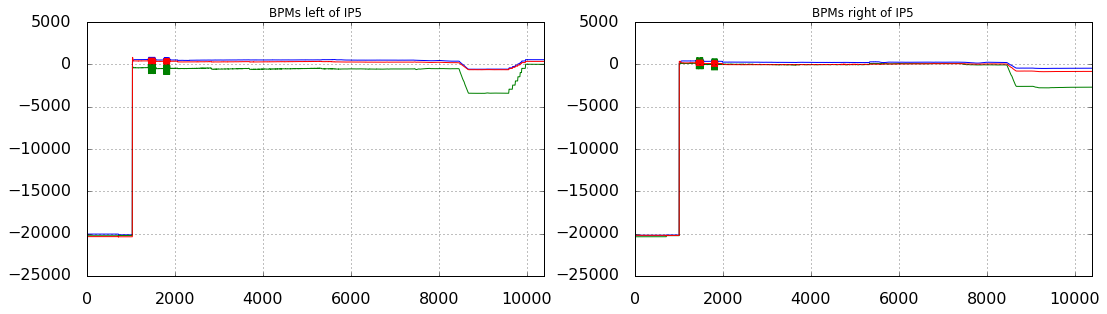

In [5]:
from IPython.display import Image
Image('testout.png')

In [21]:
pngnames = {resources_with_fig['outputs'].keys()[i] : 'RelativeBPMplot' + str(i) + '.png'  
            for i in range(len(resources_with_fig['outputs'].keys()))}
for k in resources_with_fig['outputs'].keys():
    fo = open(pngnames[k],'wb')
    fo.write(resources_with_fig['outputs'][k])
    fo.close()